In [1]:
import random
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import f
from statsmodels.stats.weightstats import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pandas as pd

In [2]:
def pooled_mean(*args):
    res = sum([len(args[i])*np.mean(args[i]) for i in range(len(args))])/sum([len(args[i]) for i in range(len(args))])
    return res

In [3]:
def pooled_var(*args):
    res = sum([(len(args[i])-1)*np.var(args[i]) for i in range(len(args))])/sum([(len(args[i])-1) for i in range(len(args))])
    return res

In [7]:
random.seed(20)
X1 = np.array([random.normalvariate(5,2) for _ in range(50)])
X2 = np.array([random.normalvariate(5,2) for _ in range(200)])
X3 = np.array([random.normalvariate(5,2) for _ in range(100)])

In [5]:
print(X1.mean(), X1.var(), X1.std(), sep =' ')

4.691392622081047 4.191011216620246 2.0471959399677027


In [6]:
print(X2.mean(), X2.var(), X2.std(), sep =' ')

4.850677410245284 4.397105872052144 2.096927722181226


In [7]:
print(X3.mean(), X3.var(), X3.std(), sep =' ')

5.164707847095249 4.1366504961535915 2.0338757327215427


In [8]:
pooled_mean(X1, X2, X3)

4.917645422464669

In [9]:
pooled_var(X1, X2, X3)

4.29369457427082

In [10]:
np.sqrt(pooled_var(X1, X2, X3))

2.07212320441397

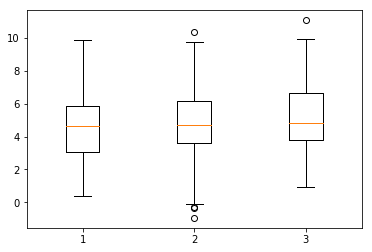

In [11]:
plt.boxplot([X1, X2, X3])
plt.savefig('lab3_1.png')

In [12]:
stats.bartlett(X1,X2,X3)

BartlettResult(statistic=0.10694166709938555, pvalue=0.9479335884585145)

In [5]:
def disp_analyses_tabl(*args):
    tabl = np.zeros((3, 3))
    k = len(args) #num_of_groups
    n = sum([len(args[i]) for i in range(k)])# general num of el
    full_sample = np.concatenate([args[i] for i in range(k)], axis = 0)
    n_i = [len(args[i]) for i in range(k)]
    v_i = [np.var(args[i]) for i in range(k)]
    m_i = [np.mean(args[i]) for i in range(k)]
    m = np.mean(full_sample)
    d_vn_gr = np.average(v_i, weights=n_i)
    tabl[1][0] = d_vn_gr
    tabl[1][1] = n - k
    tabl[1][2] = d_vn_gr*(n/(n-k))
    d_ob = np.var(full_sample)
    tabl[2][0] = d_ob
    tabl[2][1] = n - 1
    tabl[2][2] = d_ob*(n/(n-1))
    d_m_gr = np.average(np.array([m_i[i] - m for i in range(k)])**2, weights=n_i)
    tabl[0][0] = d_m_gr
    tabl[0][1] = k - 1
    tabl[0][2] = d_m_gr*(n/(k-1))
    return tabl

In [8]:
tabl = disp_analyses_tabl(X1, X2, X3)
tabl

array([[2.73155531e-02, 2.00000000e+00, 4.78022179e+00],
       [4.29324796e+00, 3.47000000e+02, 4.33036537e+00],
       [4.32056351e+00, 3.49000000e+02, 4.33294335e+00]])

In [9]:
tabl[0][0]+tabl[1][0]

4.32056350982694

In [17]:
tabl[0][0]/tabl[2][0]

0.006340335257509371

In [18]:
np.sqrt(tabl[0][0]/tabl[2][0])

0.07962622217278283

In [2]:
#X1 = [19, 23, 26, 18, 20, 20, 18, 35]
#X2 = [20, 20, 32, 27, 40, 24, 22, 18]
#X3 = [16, 15, 18, 26, 19, 17, 19, 18]
#stats.f_oneway(X1,X2,X3)

F_onewayResult(statistic=2.860444285202436, pvalue=0.07968346060498976)

In [19]:
stats.f_oneway(X1,X2,X3)

F_onewayResult(statistic=1.1038841710135312, pvalue=0.33274218949140133)

In [20]:
our_df = pd.DataFrame(np.concatenate([X1,X2,X3],axis=0), columns=['data'])
our_df['label'] = 50*[1] + 200*[2] + 100*[3]
our_df[:20]

,data,label
0,2.737843,1
1,5.301297,1
2,3.000650,1
3,7.804416,1
4,3.536620,1
5,7.110154,1
6,4.330699,1
7,7.064397,1
8,1.635317,1
9,1.534241,1


In [21]:
res = pairwise_tukeyhsd(our_df['data'], our_df['label'])
print(res)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.1593  -0.6152 0.9338 False 
  1      3     0.4733  -0.3751 1.3217 False 
  2      3     0.314   -0.2859 0.914  False 
--------------------------------------------


In [22]:
comb_arr = []
for i in range(len(res.groupsunique)-1):
    for j in range(len(res.groupsunique)):
        if i<j:
            comb_arr.append((res.groupsunique[i], res.groupsunique[j]))
comb_arr

[(1, 2), (1, 3), (2, 3)]

In [23]:
res.groupsunique

array([1, 2, 3])

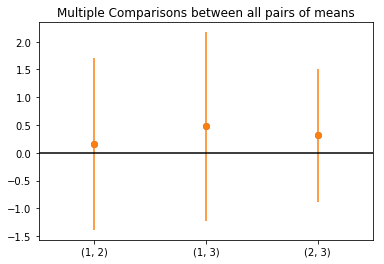

In [24]:
plt.plot([1,2,3], res.meandiffs, 'o')
plt.errorbar([1,2,3], res.meandiffs, yerr=np.abs(res.confint[:,1] - res.confint[:,0]), fmt = 'o')
xlim = 0.5, 3.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.xticks([1,2,3], comb_arr)
plt.title('Multiple Comparisons between all pairs of means')
plt.savefig('lab3_2')

In [101]:
stats.ttest_ind(X1, X2)

Ttest_indResult(statistic=-0.4807528135353027, pvalue=0.631116025302671)

In [102]:
stats.ttest_ind(X1, X3)

Ttest_indResult(statistic=-1.3316851085720296, pvalue=0.1850110086382242)

In [103]:
stats.ttest_ind(X2, X3)

Ttest_indResult(statistic=-1.2308935710653655, pvalue=0.21933328994523812)